# Chronic Kidney Disease project

team: 6<br>
section: 81<br>
members information:<br>
Rawan Alsubaie - 219019745<br>
Razan alabdulhadi - 219020936 <br>
Shaden Alhudayb - 219012853<br>
Abrar Alrebh - 219021845

In [1]:
#import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read dataset
ds = pd.read_csv("kidney_disease.csv")
ds.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#describe dataset
ds.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Data preprocessing:

In [4]:
#replace ? with nan to proccess it
from numpy import nan
ds = ds.replace('?', nan)

In [5]:
#checking null values in each column
ds.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
#convert string values with integers
class_labels = LabelEncoder()
categ_features= ['classification','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','wc','rc','pcv']
for categ in categ_features:
    ds[categ] = class_labels.fit_transform(ds[categ].values)

In [7]:
ds.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0


In [8]:
ds['classification']

0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: classification, Length: 400, dtype: int32

In [9]:
ds.loc[(ds['classification']==1)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
37,37,72.0,80.0,NaN,NaN,NaN,2,2,0,0,...,16,64,4,1,4,1,1,0,1,1
230,230,65.0,60.0,1.01,2.0,0.0,1,0,1,0,...,44,87,49,1,4,1,1,0,0,1


In [10]:
#drops rows with false values
ds=ds.drop(37)
ds=ds.drop(230)

In [11]:
ds['classification'] = class_labels.fit_transform(ds['classification'].values)
ds['classification']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 398, dtype: int64

In [12]:
#fill null values with mean of each column
ds=ds.fillna(ds.mean(numeric_only=True))

In [13]:
ds.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

<AxesSubplot:ylabel='classification'>

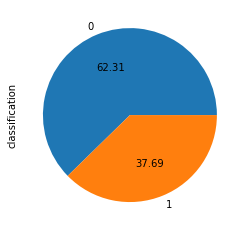

In [14]:
#check if dataset is balance or not
ds['classification'].value_counts().plot.pie(autopct="%.2f")

In [15]:
from sklearn.utils import resample  
#fix an Unbalanced Dataset by using oversample
#dividing classification to majority and minority 
ds_majority = ds[(ds['classification']==0)] 
ds_minority = ds[(ds['classification']==1)] 
# upsample minority class
ds_minority_upsampled = resample(ds_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 248, # to match majority class
                                 random_state=30)  # reproducible results
# Combine majority class with upsampled minority class
ds_upsampled = pd.concat([ds_minority_upsampled, ds_majority])

<AxesSubplot:ylabel='classification'>

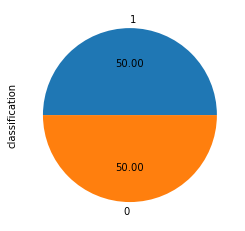

In [16]:
ds_upsampled['classification'].value_counts().plot.pie(autopct="%.2f")

In [17]:
#dividing dataset to labels and features
labels = ds_upsampled['classification'].copy() 
features = ds_upsampled.iloc[:,:25].copy()

In [18]:
print(features)  

      id   age     bp        sg        al        su  rbc  pc  pcc  ba  ...  \
287  287  39.0   70.0  1.025000  0.000000  0.000000    1   1    0   0  ...   
295  295  44.0   70.0  1.017429  1.014164  0.451429    2   2    0   0  ...   
390  390  52.0   80.0  1.025000  0.000000  0.000000    1   1    0   0  ...   
380  380  59.0   60.0  1.020000  0.000000  0.000000    1   1    0   0  ...   
303  303  55.0   70.0  1.020000  0.000000  0.000000    1   1    0   0  ...   
..   ...   ...    ...       ...       ...       ...  ...  ..  ...  ..  ...   
245  245  48.0  100.0  1.017429  1.014164  0.451429    2   2    0   0  ...   
246  246  48.0  110.0  1.015000  3.000000  0.000000    0   1    1   0  ...   
247  247  54.0   90.0  1.025000  1.000000  0.000000    1   0    0   0  ...   
248  248  59.0   70.0  1.010000  1.000000  3.000000    0   0    0   0  ...   
249  249  56.0   90.0  1.010000  4.000000  1.000000    1   0    1   0  ...   

          hemo  pcv  wc  rc  htn  dm  cad  appet  pe  ane  
287

In [19]:
print(labels)

287    1
295    1
390    1
380    1
303    1
      ..
245    0
246    0
247    0
248    0
249    0
Name: classification, Length: 496, dtype: int64


# Visualization Data:

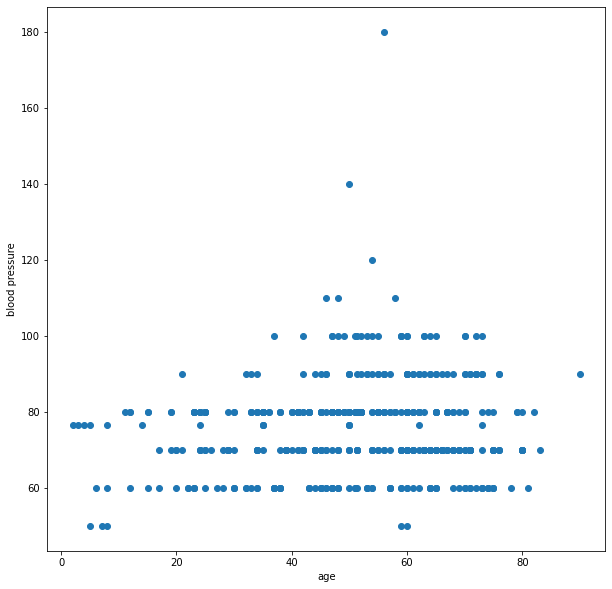

In [20]:
#visualization

# Relationship between age and blood pressure
fig = plt.figure(figsize=(10, 10))
plt.scatter(ds_upsampled['age'], ds_upsampled['bp'])
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.show()

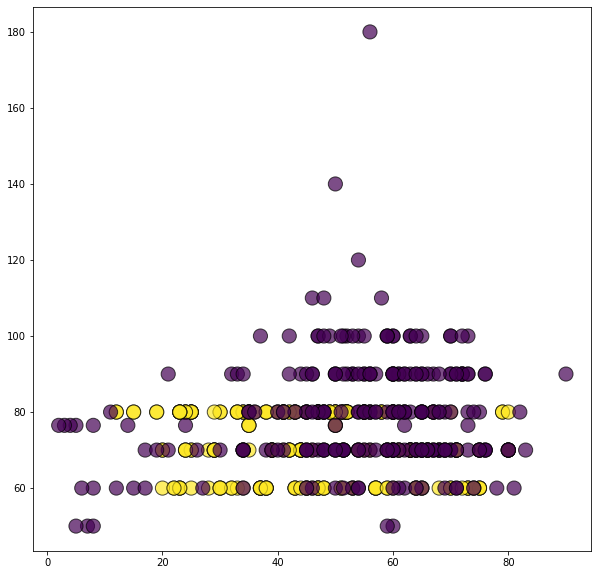

In [21]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(ds_upsampled['age'], ds_upsampled['bp'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=ds_upsampled['classification'])
plt.show()

In [22]:
#Outlier detection - Tukey IQR
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

tukey_indices, tukey_values = find_outliers_tukey(ds_upsampled['bp'])
print(np.sort(tukey_values))

[ 50.  50.  50.  50.  50. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 110. 110. 110. 120. 140. 180.]


C:\Users\abrar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


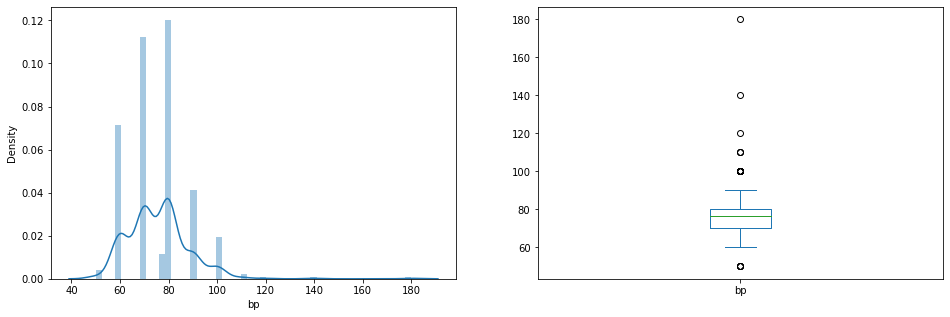

In [23]:
import seaborn as sns
plt.subplot(121), sns.distplot(ds_upsampled['bp'])
plt.subplot(122), ds_upsampled['bp'].plot.box(figsize=(16,5))
plt.show()

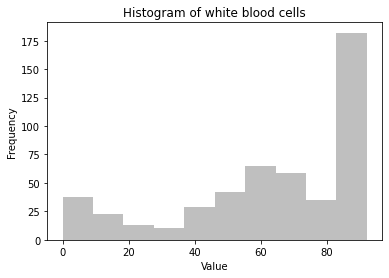

In [24]:
#Distribution of Features
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of white blood cells".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
plot_histogram(ds_upsampled['wc']) 

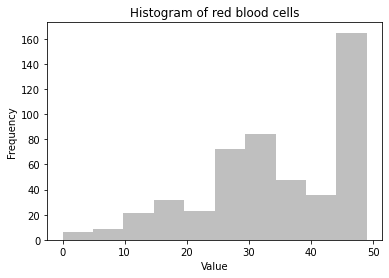

In [25]:
#Distribution of Features
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of red blood cells".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
plot_histogram(ds_upsampled['rc'])  

<AxesSubplot:>

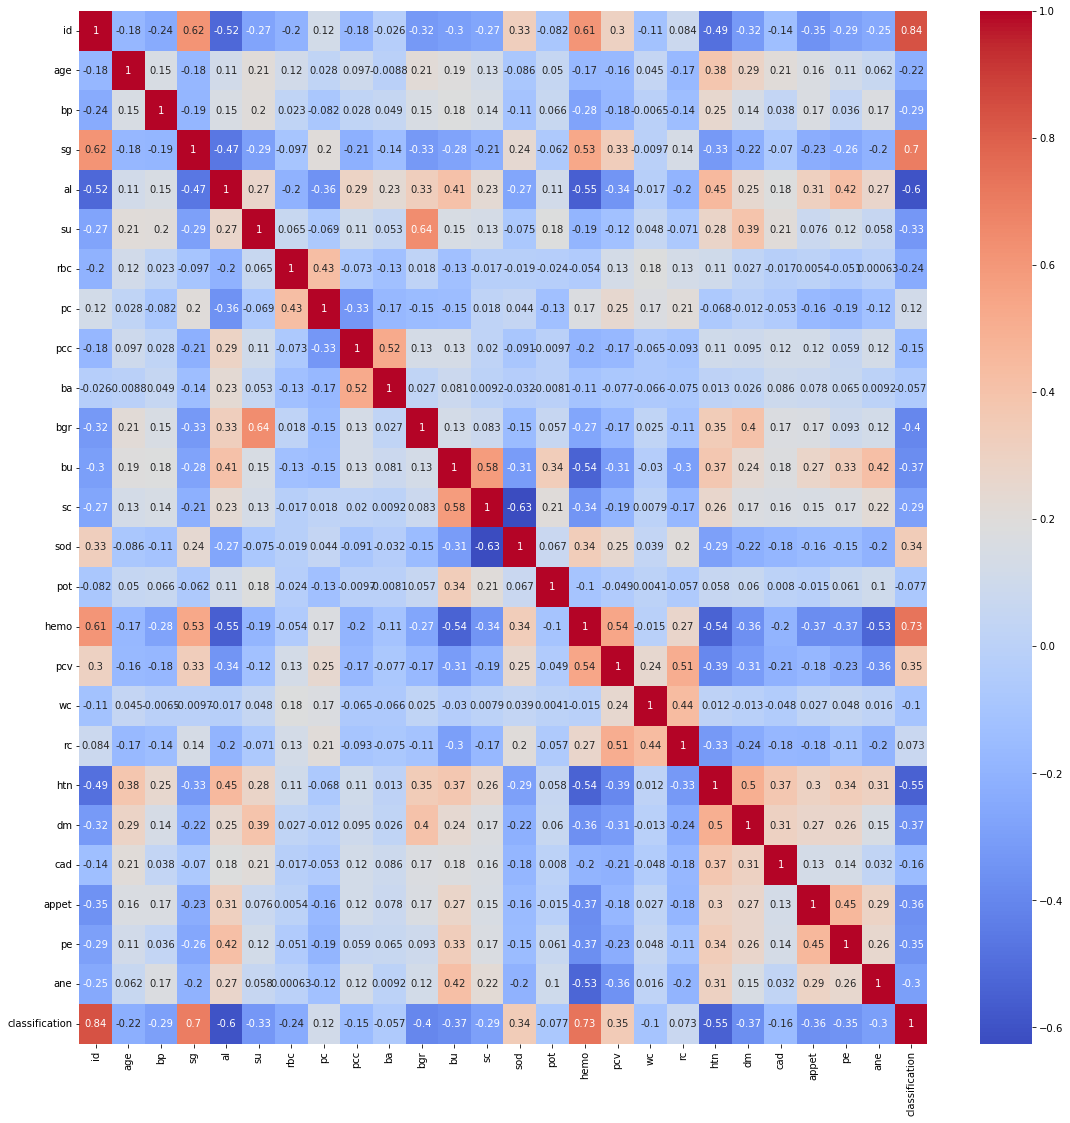

In [26]:
#correlation matrix
plt.figure(figsize = (19,19))
sns.heatmap(ds.corr(), annot = True, cmap = 'coolwarm')

# Models:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=1)


In [21]:
X_train.shape

(297, 25)

In [22]:
X_test.shape

(199, 25)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=1)
scaler = MinMaxScaler()#normalization of dataset
scaler.fit(X_train)# fit on training data only
X_train = scaler.transform(X_train) # transform training
X_test = scaler.transform(X_test) # transform test

In [28]:
#check generalization model or not
clff = DecisionTreeClassifier() 
clff = clff.fit(X_train, y_train)
y_train_pred = clff.predict(X_train)
Train= metrics.accuracy_score(y_train_pred, y_train)
y_test_pred = clff.predict(X_test)
Test= metrics.accuracy_score(y_test_pred, y_test)
print('Train Accuracy: ',Train)
print('Test Accuracy: ',Test)

Train Accuracy:  1.0
Test Accuracy:  1.0


Text(6.0, 0.5, 'Predicted Label')

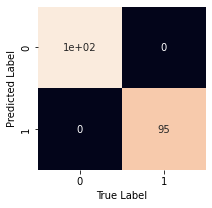

In [29]:
#correlation matrix for DecisionTree
from sklearn.metrics import confusion_matrix
clff_pred = clff.predict(X_test)
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(confusion_matrix(y_test,clff_pred),annot=True,cbar=False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")


In [23]:
#first model is DecisionTree is optimal for our problem
clf_d = DecisionTreeClassifier()                  
clf_d = clf_d.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_d.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        95

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



In [25]:
from sklearn import tree
text_representation = tree.export_text(clf_d)
print(text_representation)



|--- feature_0 <= 249.00
|   |--- class: 0
|--- feature_0 >  249.00
|   |--- class: 1



[Text(0.5, 0.75, 'X[0] <= 249.0\ngini = 0.5\nsamples = 297\nvalue = [144, 153]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 144\nvalue = [144, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 153\nvalue = [0, 153]')]

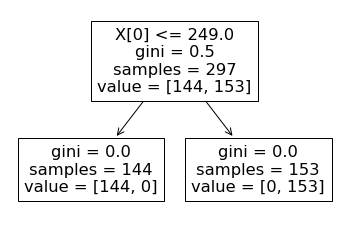

In [27]:
tree.plot_tree(clf_d) # the clf is your decision tree model


In [31]:
#secound model is svm
from sklearn import svm

clf_svm = svm.SVC()

clf_svm.fit(X_train, y_train)


y_pred = clf_svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       104
           1       1.00      0.97      0.98        95

    accuracy                           0.98       199
   macro avg       0.99      0.98      0.98       199
weighted avg       0.99      0.98      0.98       199



In [32]:
#third model is SGDClassifier
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(loss="log", penalty="l2", max_iter=5)

clf_SGD.fit(X_train, y_train)

SGDClassifier(max_iter=5)

y_pred=clf_SGD.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       104
           1       1.00      0.97      0.98        95

    accuracy                           0.98       199
   macro avg       0.99      0.98      0.98       199
weighted avg       0.99      0.98      0.98       199



C:\Users\abrar\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [33]:
#fourth model is MLPClassifier
from sklearn.neural_network import MLPClassifier


clf_MLP = MLPClassifier(random_state=1, max_iter=100).fit(X_train, y_train)

y_pred=clf_MLP.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       104
           1       0.99      0.97      0.98        95

    accuracy                           0.98       199
   macro avg       0.98      0.98      0.98       199
weighted avg       0.98      0.98      0.98       199



C:\Users\abrar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
#fifth model is GaussianNB
from sklearn.naive_bayes import GaussianNB
clf_GaussianNB = GaussianNB()
clf_GaussianNB.fit(X_train, y_train)

y_pred=clf_GaussianNB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       104
           1       0.91      0.93      0.92        95

    accuracy                           0.92       199
   macro avg       0.92      0.92      0.92       199
weighted avg       0.92      0.92      0.92       199

